# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 There is a strong correlation between the mouse's weight and the tumor size.
There is one outlier for Infubinol that shows a smaller tumor compared to the others.
Each drug regiment varies in tumor size with ramicane possibly being the most effective.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate mice
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

In [8]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
num_mice_cleaned

249

In [10]:
# Remove duplicates for the specific mouse "g989" and recheck the number of unique mice
cleaned_data_no_duplicates = cleaned_data[cleaned_data['Mouse ID'] != 'g989']

# Check the number of unique mice again
num_mice_no_duplicates = cleaned_data_no_duplicates['Mouse ID'].nunique()

# Display the cleaned DataFrame again

num_mice_no_duplicates

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

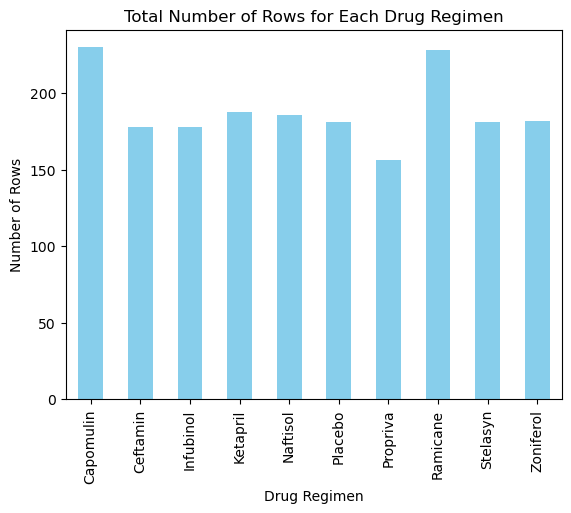

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_data.groupby('Drug Regimen').size()
drug_regimen_counts.plot(kind='bar', title='Total Number of Rows for Each Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Rows', color='skyblue')

# Display the plot
plt.show()

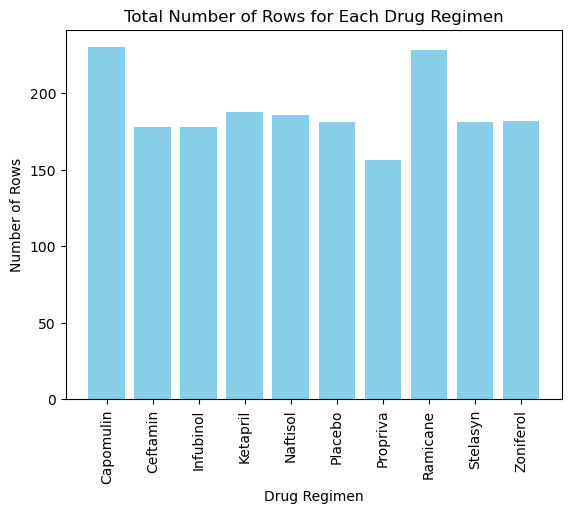

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Use pyplot to create the bar plot
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.xticks(rotation=90)
# Display the plot
plt.show()

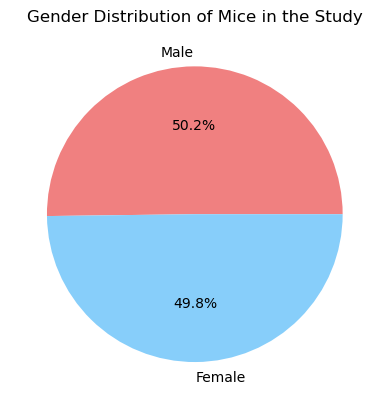

In [18]:
# Get the unique mice with their gender
gender_distribution = cleaned_data.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()

# Create the pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution of Mice in the Study', colors=['lightcoral', 'lightskyblue'])

# Display the plot
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.show()


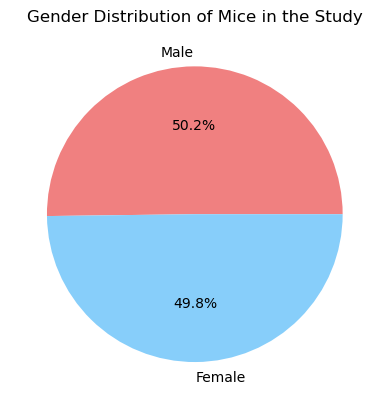

In [20]:
# Get the unique mice with their gender using pyplot
gender_distribution = cleaned_data.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()

# Generate the pie chart using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=0)

# Add title
plt.title('Gender Distribution of Mice in the Study')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Get the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Merge the last timepoint data with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'])

# Filter for the selected treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_data = last_timepoint_data[last_timepoint_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]



In [26]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds

# List of treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for plotting
tumor_vol_data = []

# Loop through each treatment to calculate the IQR and determine potential outliers
for treatment in treatments:
    # Filter the data for the current treatment regimen
    treatment_data = final_tumor_data[final_tumor_data['Drug Regimen'] == treatment]
    
    # Get the tumor volume data for the current treatment
    tumor_vol = treatment_data['Tumor Volume (mm3)']
    
    # Calculate the IQR (Interquartile Range)
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    
    # Determine the upper and lower bounds for potential outliers
    lower_bound = quartiles[0.25] - (1.5 * IQR)
    upper_bound = quartiles[0.75] + (1.5 * IQR)
    
    # Find the outliers in the current tumor volume data
    outliers = treatment_data[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Store the outliers and tumor volume data for the current treatment
    tumor_vol_data.append((treatment, tumor_vol, outliers))

# Display the outliers for each treatment regimen
outliers_data = {}

for treatment, tumor_vol, outliers in tumor_vol_data:
    outliers_data[treatment] = outliers[['Mouse ID', 'Tumor Volume (mm3)']]

outliers_data



{'Capomulin': Empty DataFrame
 Columns: [Mouse ID, Tumor Volume (mm3)]
 Index: [],
 'Ramicane': Empty DataFrame
 Columns: [Mouse ID, Tumor Volume (mm3)]
 Index: [],
 'Infubinol':    Mouse ID  Tumor Volume (mm3)
 31     c326           36.321346,
 'Ceftamin': Empty DataFrame
 Columns: [Mouse ID, Tumor Volume (mm3)]
 Index: []}

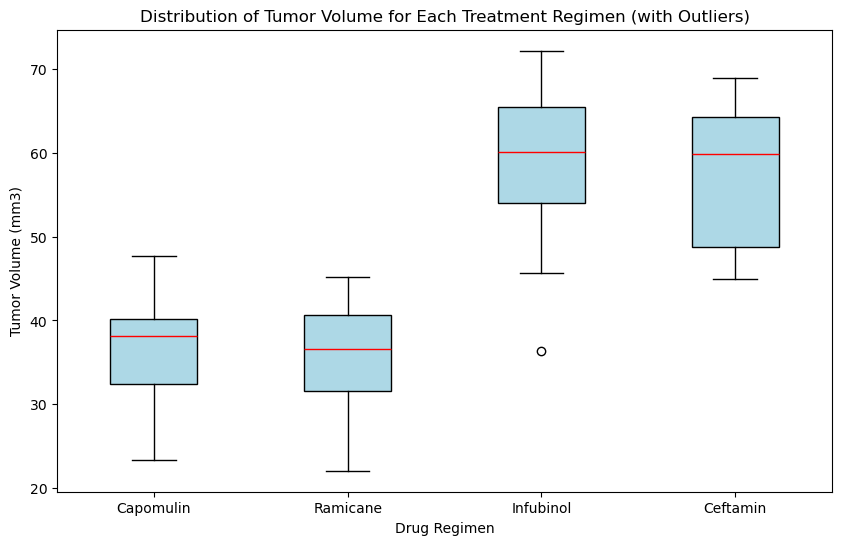

In [28]:
# Generate a box plot using the outliers_data to focus on treatments and include the identified outliers
# Create a list to store the tumor volume data for each treatment regimen, including outliers
outlier_tumor_data = {
    treatment: final_tumor_data[final_tumor_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    for treatment, outliers in outliers_data.items()
}

# Generate the box plot for tumor volumes across treatments, including outliers
plt.figure(figsize=(10, 6))
plt.boxplot(outlier_tumor_data.values(), labels=outlier_tumor_data.keys(), patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='red'))

# Add title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Regimen (with Outliers)')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


## Line and Scatter Plots

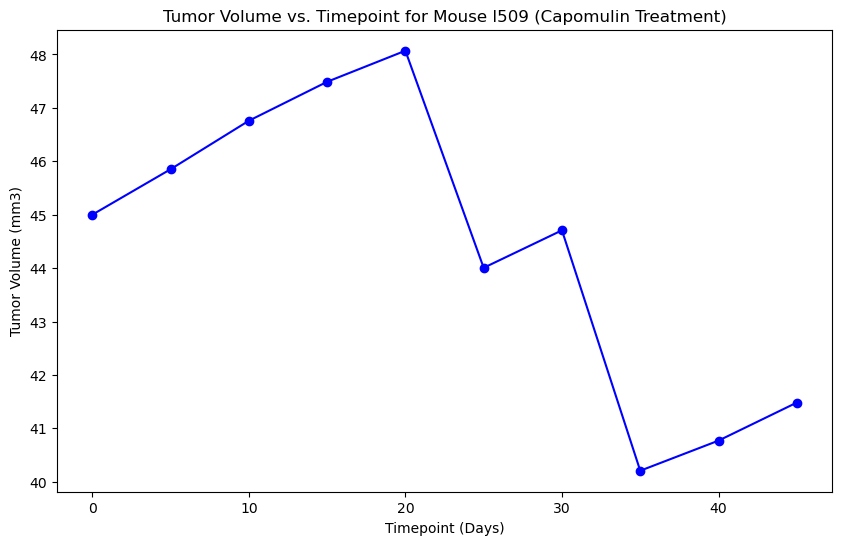

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Select a single mouse (e.g., mouse ID 'l509')
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')

# Add title and labels
plt.title('Tumor Volume vs. Timepoint for Mouse l509 (Capomulin Treatment)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


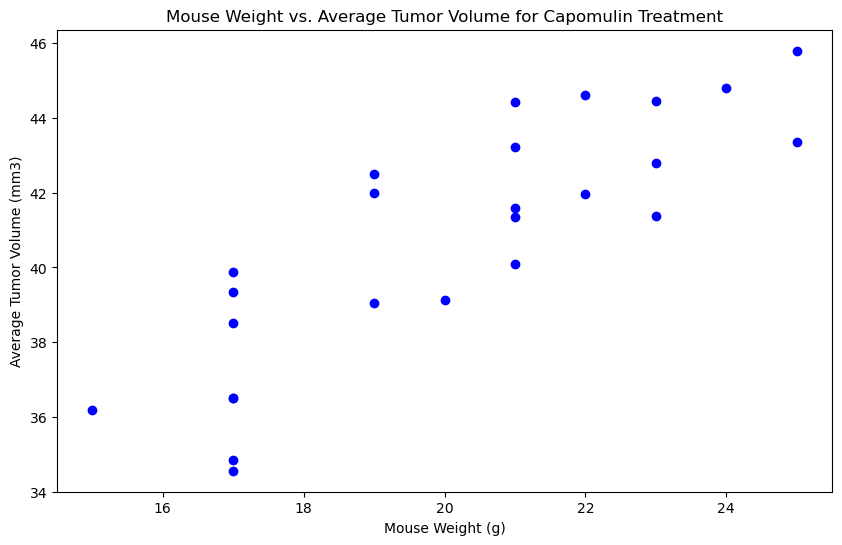

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin treatment regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot of mouse weight vs. average observed tumor volume for the Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_vol, color='blue')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()


## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = mouse_weights.corr(average_tumor_vol)

# Perform linear regression for mouse weight vs. average tumor volume
from sklearn.linear_model import LinearRegression
X = mouse_weights.values.reshape(-1, 1)  # Independent variable (mouse weight)
y = average_tumor_vol.values  # Dependent variable (tumor volume)

# Initialize and fit the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Get the regression line
regression_line = linear_regressor.predict(X)

# Display the correlation coefficient and plot the regression line
correlation, regression_line


(0.8419363424694722,
 array([42.54983369, 41.595394  , 37.77763525, 39.68651462, 42.54983369,
        44.45871307, 40.64095431, 43.50427338, 41.595394  , 41.595394  ,
        39.68651462, 37.77763525, 39.68651462, 45.41315276, 37.77763525,
        45.41315276, 37.77763525, 43.50427338, 37.77763525, 37.77763525,
        41.595394  , 43.50427338, 41.595394  , 35.86875587, 37.77763525]))

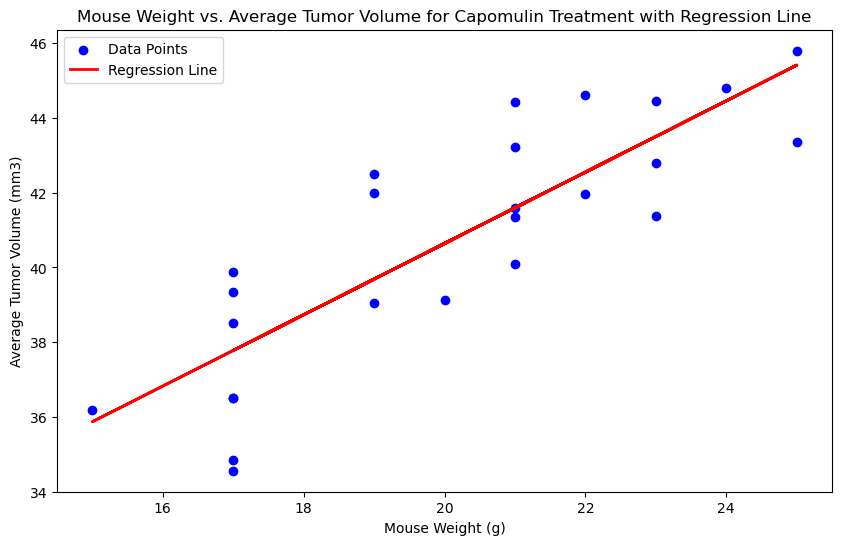

In [33]:
# Generate the scatter plot and overlay the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_vol, color='blue', label='Data Points')
plt.plot(mouse_weights, regression_line, color='red', linewidth=2, label='Regression Line')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment with Regression Line')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show legend
plt.legend()

# Display the plot
plt.show()